## Handling Highly Skewed Data
* Skewness of a distribution is defined as the lack of symmetry. In a symmetrical distribution, the Mean, Median and Mode are equal. The normal distribution has a skewness of 0.

* Skewness tell us about distribution of our data. Skewness tells us about where most
of the values are concentrated on an ascending scale.

Now, the question is when we can say our data is moderately skewed or heavily skewed?
### The thumb rule is:
* If the skewness is between -0.5 to +0.5 then we can say data is fairly symmetrical.
* If the skewness is between -1 to -0.5 or 0.5 to 1 then data is moderately skewed.
* And if the skewness is less than -1 and greater than +1 then our data is heavily skewed.

## Types of Skewness
* Positive skewness: In simple words, if the skewness is greater than 0 then the distribution is positively
skewed. The tail on the right side of the distribution will be longer or flatter. If the data is positively skewed than most of values will be concentrated below the average value of the data.

* Negative skewness: If the skewness is less than 0 then the distribution is negatively skewed. For negatively
skewed data, most of the values will be concentrated above the average value and tail on the left side of the
distribution will be longer of flatter.

# What does skewness tells us?
* Consider house prices ranging from 100k to 1,000,000 with the average being 500,000.
If the peak of the distribution is in left side that means our data is positively
skewed and most of the houses are being sold at the price less than the
average.

* Skewness of a data indicates the direction and relative magnitude of a distribution's deviation from the
normal distribution. Skewness considers the extremes of the dataset rather than concentrating only on the
average.

* Many models assume normal distribution but in reality data points may not be perfectly symmetric. If the data are
skewed, then this kind of model will always underestimate the skewness risk. The more the data is skewed the
less accurate the model will be.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('cars_datasets.csv')

In [3]:
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


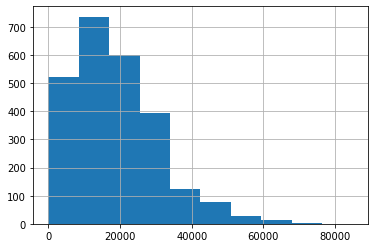

In [4]:
df.price.hist(); # Inspecting distribution of Price variable 

In [5]:
import seaborn as sns

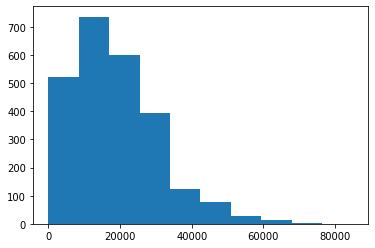

In [6]:
df['price'].hist(grid = False) # Histogram using seaborn

In [7]:
df['price'].skew()

0.9227307836499805

As we can see the skewed value is 0.922, lies between the 0.5 to 1 range. so, data is moderately skewed and right skewed (but it's fine to train the model with it). Let's explore another attribute.

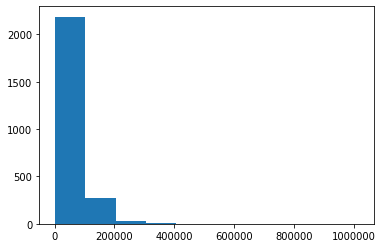

In [8]:
df['mileage'].hist(grid = False);

In [9]:
df['mileage'].skew()

7.0793210165347915

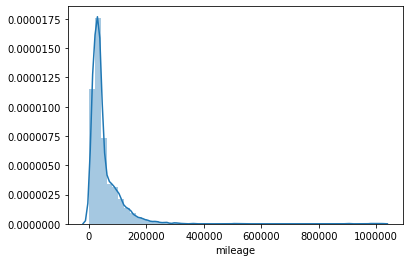

In [10]:
sns.distplot(df['mileage'], hist = True)

As we can see the skewed value is 7.079, greater than +1. So, our data is heavily skewed. data['mileage'] is right skewed by looking at the graph and skewed values.

## How to handle these skewed data?

### Transformation
In data analysis transformation is the replacement of a variable by a function of that variable: for example, replacing a variable x by the square root of x or the logarithm of x. In a stronger sense, a transformation is a replacement that changes the shape of a distribution or relationship.
* A transformation may be used to reduce skewness. A distribution that is symmetric or
nearly so is often easier to handle and interpret than a skewed distribution.
### Steps to do transformation
* 1. Draw a graph(histogram and density plot) of the data to see how far patterns in data match the simplest ideal
patterns.
* 2. check the range the data. Because Transformations will have little effect if the range is small.
* 3. check the skewness by statistical methods(decide right and left skewness).
* 4. apply the methods (explained in detail below) to handle the skewness based on the skewed values.

## To handle the right skewness, we use:
- logarithms (best for it)
- roots[square root and cube root] (good)
- reciprocals (weak)

## To handle left skewness, we use:
- squares
- cubes
- higher powers.

## Log Transformation
* The log transformation is widely used in research to deal with skewed data. It is the best method to handle the right skewed data.

In [11]:
#performing the log transformation using numpy
log_mileage = np.log(df['mileage'])

C:\Users\Vipin\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
log_mileage.head(10)

0    12.521310
1    12.157680
2    10.586332
3    11.068917
4     8.802973
5    10.726807
6    11.912037
7    10.065819
8     9.145375
9    11.057503
Name: mileage, dtype: float64

In [13]:
log_mileage.skew()

nan

It's giving us nan because there are some values as the zero.
Let's use other transformation.

## Root Transformation
### 1. Square Root Transfomation
* The square root is a transformation with a moderate effect on distribution shape. It is weaker than the logarithm and the cube root.
* It is also used for reducing right skewness, and also has the advantage that it can be applied to zero values.
* Note that the square root of an area has the units of a length. It is commonly applied to counted data, especially if the values are mostly rather small.

In [14]:
sqrt_mileage = np.sqrt(df['mileage'])

In [15]:
sqrt_mileage.head(10)

0    523.561840
1    436.522623
2    198.972360
3    253.270606
4     81.572054
5    213.450228
6    386.069942
7    153.378617
8     96.803926
9    251.829307
Name: mileage, dtype: float64

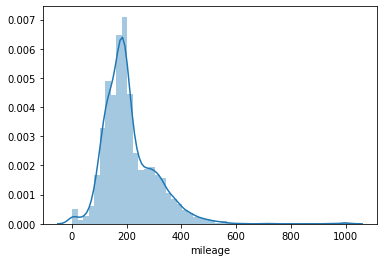

In [16]:
sns.distplot(sqrt_mileage)

In [17]:
sqrt_mileage.skew()

1.6676282633339148

In previous case we got the nan because of zero, but the square root transformation has reduced the skewed
values from 7.07 to 1.66. Which is nearer to zero compare to 7.07.

## 2. Cube Root Transformation
* It is a fairly strong transformation with a substantial effect on distribution
shape,
* It is weaker than the logarithm but stronger than the square root transformation.
* It is also used for reducing right skewness, and has the advantage that it can be applied to zero and negative
values. 
* Note that the cube root of a volume has the units of a length. It is commonly applied to rainfall data.

In [18]:
#calculating the cube root for the column data['mileage'] column
cube_mileage = np.cbrt(df['mileage'])

In [19]:
cube_mileage.head(10)

0    64.959896
1    57.544590
2    34.082269
3    40.030394
4    18.808793
5    35.716132
6    53.020521
7    28.653425
8    21.082817
9    39.878381
Name: mileage, dtype: float64

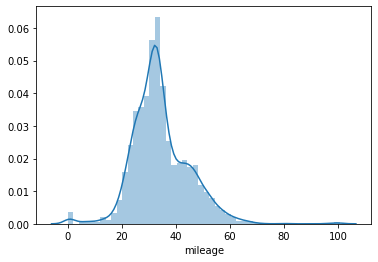

In [20]:
sns.distplot(cube_mileage);

In [21]:
cube_mileage.skew()

0.6866069687334178

In logarithm transformation we got the nan because of zero, and in the square root transformation it has
reduced the skewed values from 7.07 to 1.66. but now in cube root transformation the skewed values reduced to
0.68. and it is very much near to zero compare to 1.66 and 7.07.

## Reciprocals Transformation
* The reciprocal, with its sibling the negative reciprocal, is a very strong transformation with a
drastic effect on distribution shape.
* It can not be applied to zero values. Although it can be applied to negative values, it is not useful unless all
values are positive.

In [22]:
#calculating the reciprocal for the column data['mileage'] column
rcp_mileage = np.reciprocal(df['mileage'])

C:\Users\Vipin\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [23]:
#sns.distplot(rcp_mileage)

In [24]:
rcp_mileage.skew()

nan

It's giving output as nan because there are some values as the zero. In reciprocal transformation, it's good
deal with negative numbers not with zero.

## To Handle Left skewness

In [25]:
#let's create small dataset & have a look on left skewness
Data = [['sameer',10],['pankaj',20],['sam',30],['Hemant',48],['vivek',62],['ram',87],['suman', 93],
        ['anup',85],['mohit',60],['sandeep',75],['ajeet',84],
        ['yash',90], ['sam', 99], ['deepak', 92],['vikas', 99],['rajiv',95],['sivam', 94],['akash',89],
        ['vinod',90],['Kundan',87],['Abhay',99]]

In [26]:
df = pd.DataFrame(Data, columns = ['Name', 'Marks'])

In [27]:
#df

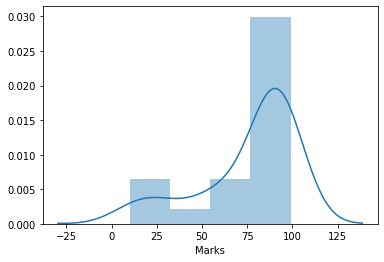

In [28]:
sns.distplot(df['Marks']);

In [29]:
df['Marks'].skew()

-1.4076657771292151

Our data is left skewed here; the skewed value is less than -1. Let's try to make it symmetric.

## Squares Transformation
* The square has a moderate effect on distribution shape and it could be used to reduce left skewness.
* Squaring usually makes sense only if the variable concerned is zero or positive, given that (-x)^2 and x^2 are identical.

In [30]:
#calculating the square for the column df['Marks'] column
sq_marks = np.square(df['Marks'])

In [31]:
sq_marks.head(10)

0     100
1     400
2     900
3    2304
4    3844
5    7569
6    8649
7    7225
8    3600
9    5625
Name: Marks, dtype: int64

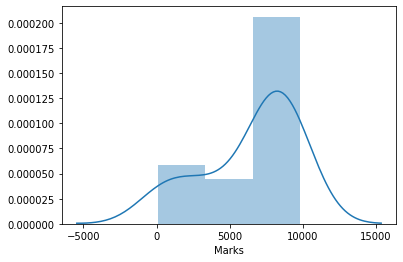

In [32]:
sns.distplot(sq_marks);

In [33]:
sq_marks.skew()

-0.9341854225868288

After applying the square Transformation, we are getting the skewed value as 0.93. If the skewed value lies in between -1 to 0.5 then data is moderately skewed. Let’s try some other transformation.

## Cubes Transformation
* The cube has a better effect on distribution shape than squaring and it could be used to reduce left
skewness.

In [34]:
cube_marks = np.power(df['Marks'], 3)

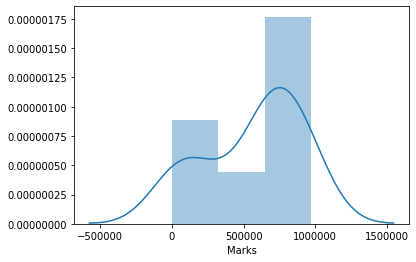

In [35]:
sns.distplot(cube_marks)

In [36]:
cube_marks.skew()

-0.6133662709032679

After applying the cube transformation, the skewed value is -0.6. Let’s try some other transformation.

## Higher Powers
* When simple transformation like square and cubes doesn’t reduce the skewness in the data distribution, we can use higher powers to transform to data. It is only useful in left skewness.

In [37]:
high_power_marks = np.power(df['Marks'], 4)

In [38]:
high_power_marks.skew()

-0.3563776896040546

After applying the higher power (power = 4) the skewness is changed from
-1.4 to -0.35.If the skewness is between -0.5 to +0.5 then we can say data is fairly
symmetrical. So, finally we have got the best result and we got the skew value as
-0.3.

Incase if we would not have got this skew value still after applying these many
powers, we can increase the power to get better result. You can check out the
below for better understanding:

In [39]:
high_power_marks = np.power(df['Marks'], 5)

In [40]:
high_power_marks.skew()

-0.12781688683710232

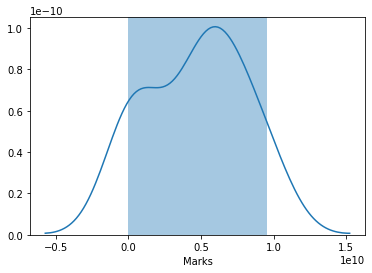

In [41]:
sns.distplot(high_power_marks);

In [42]:
high_power_marks = np.power(df['Marks'], 6)

In [43]:
high_power_marks.skew()

0.08406219634567366

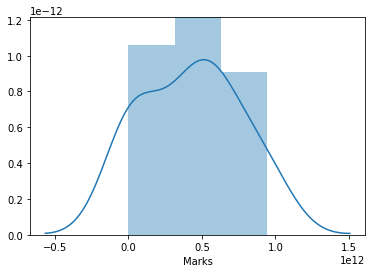

In [44]:
sns.distplot(high_power_marks);

Finally, we have got the skewed value as 0.08 (almost 0), and we can see
the data is fairly symmetrically distributed.

### Exercise

In [45]:
df = pd.read_csv('house1.csv')

In [46]:
#df.columns

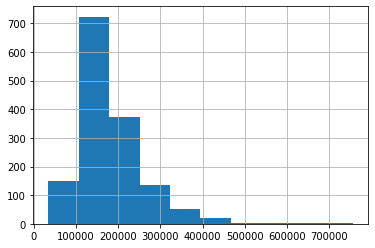

In [47]:
df.SalePrice.hist()

The histogram confirms that our dataset is positively skewed.

In [48]:
df.SalePrice.skew()

1.8828757597682129

In [49]:
from scipy.stats import norm

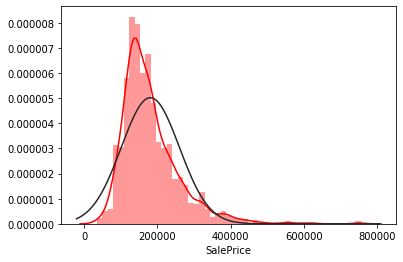

In [50]:
plt.figure()
sns.distplot(df['SalePrice'], fit = norm, color = 'r');

Applying log transformation:

In [51]:
log_SalePrice = np.log(df['SalePrice'])

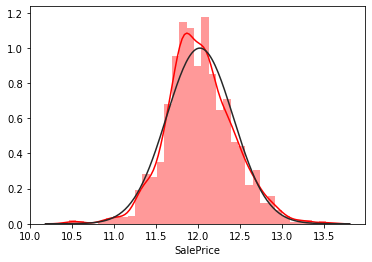

In [52]:
sns.distplot(log_SalePrice, fit = norm, color = 'r');

Now if you look the distribution it is close to normal distribution. We have reduced the skewness.

In [53]:
from scipy.stats import kurtosis

In [54]:
kurtosis(df['SalePrice'], fisher = True)

6.509812011089439

In [55]:
kurtosis(log_SalePrice)

0.8026555069117713

### Assignment: Explore Box-Cox Transformation and Yeo-Johnson Transformation with application.
* Apply these transformations on a single variable.
* Apply these transformations on entire dataset (only numeric variables).
* Study Tukey's ladder of transfpormation.